## Business Problem
An online retailer wants to optimize profit margin based on visitors intent of purchase. The retailer setting up a personalized customer experience where a visitor who is identified as some one that will make a purchase may not receive a discount. On the other hand a  visitor who is identified as some one that does not intent on purchasing may be offered a promotional discount to incentivize the visitor to make a purchase. 

Why an onlibe retailer would want to know a visotor's intent to purchase?

### Customer Purchase Intention: Definition, Why (+ How) to Measure & Convert
https://www.namogoo.com/blog/consumer-behavior-psychology/customer-purchase-intention/

### Know What Your Customers Want Before They Do
https://hbr.org/2011/12/know-what-your-customers-want-before-they-do




source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.


Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 

"Administrative",
"Administrative Duration", 
"Informational", 
"Informational Duration", 
"Product Related" 
and "Product Related Duration" 
represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.


"Bounce Rate", 
"Exit Rate" 
and "Page Value" 
features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" 
feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

link to paper 'Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks'
https://link.springer.com/article/10.1007/s00521-018-3523-0
Abstract:
In this paper, we propose a real-time online shopper behavior analysis system consisting of two modules which simultaneously predicts the visitor’s shopping intent and Web site abandonment likelihood. In the first module, we predict the purchasing intention of the visitor using aggregated pageview data kept track during the visit along with some session and user information. The extracted features are fed to random forest (RF), support vector machines (SVMs), and multilayer perceptron (MLP) classifiers as input. We use oversampling and feature selection preprocessing steps to improve the performance and scalability of the classifiers. The results show that MLP that is calculated using resilient backpropagation algorithm with weight backtracking produces significantly higher accuracy and F1 Score than RF and SVM. Another finding is that although clickstream data obtained from the navigation path followed during the online visit convey important information about the purchasing intention of the visitor, combining them with session information-based features that possess unique information about the purchasing interest improves the success rate of the system. In the second module, using only sequential clickstream data, we train a long short-term memory-based recurrent neural network that generates a sigmoid output showing the probability estimate of visitor’s intention to leave the site without finalizing the transaction in a prediction horizon. The modules are used together to determine the visitors which have purchasing intention but are likely to leave the site in the prediction horizon and take actions accordingly to improve the Web site abandonment and purchase conversion rates. Our findings support the feasibility of accurate and scalable purchasing intention prediction for virtual shopping environment using clickstream and session information data.


### Feature Selection

* Python Feature Selection Tutorial: A Beginner's Guide
https://www.datacamp.com/tutorial/feature-selection-python

* https://scikit-learn.org/stable/modules/feature_selection.html



In [1]:
# Import libraries needed

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix 

from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import metrics as k_metrics

from xgboost import XGBRFClassifier


%matplotlib inline

In [2]:
# Read 'online_shoppers_intention.csv' file

file = 'data/online_shoppers_intention.csv'
shopper = pd.read_csv(file)
shopper


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
# Check data types for columns

shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Check any colums has any null

shopper.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Check whether any record has duplicates

shopper[shopper.duplicated()]



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [8]:
shopper.drop(shopper[shopper.duplicated()].index,inplace=True)
shopper.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

Column name: Revenue
False    10297
True      1908
Name: Revenue, dtype: int64


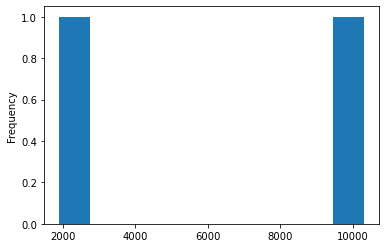

In [9]:
# Identify columns as continous or categorical

# Administrative: categorical value from 0 27, about 5643 records zero 
# Administrative_Duration: continous, about 5778 records with value of zero
# Informational: categorical value from 0 to 16, about 9574 records are zero
# Informational_Duration: continous, about 9800 records are zero
# ProductRelated: continous, max value around 500
# ProductRelated_Duration: continous
# BounceRates: continous, about 5518 records are zero
# ExitRates: continous
# PageValues: continous, about 9475 records are zero
# SpecialDay: categorical, 0, 0.2, 0.4, 0.6, 0.8 and 1, about 10956 records are zero
# Month: categorical, 10 months: Feb,Mar, May, June, Jul, Aug, Sep, Oct, Nov
# OperatingSystems: categorical, about 6541 records have value of 2 (values from 1-8)
# Browser: categorical, about 7883 records have a value of 2 (value from 1-13)
# Region: categorical, (values from 1-9)
# TrafficType: categorical (values fro 1-20)
# VisitorType: categorical, about 10431 records are returning visitors(Returning_visitor, 
#              New_visitor,Other), 
# Weekend: categorical/boolean, about 9346 records weekend false (true or false)
# Revenue: categorical/boolean,target, about 10297 records revenue false (true or false)

column_names = shopper.columns
col_num = 17
print(f'Column name: {column_names[col_num]}')
print(shopper[column_names[col_num]].value_counts())
shopper[column_names[col_num]].value_counts().plot.hist();


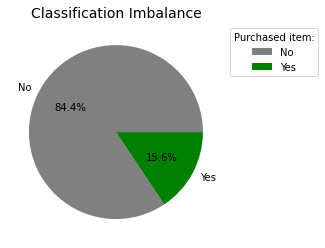

In [10]:
# Show imbalance of target
fig, axs = plt.subplots()
axs.pie(shopper['Revenue'].value_counts(normalize=True),labels=['No','Yes'],autopct='%1.1f%%',
       colors=['grey','green']);
axs.set_title('Classification Imbalance',fontsize=14)
axs.legend(title='Purchased item:',bbox_to_anchor=(1,1));


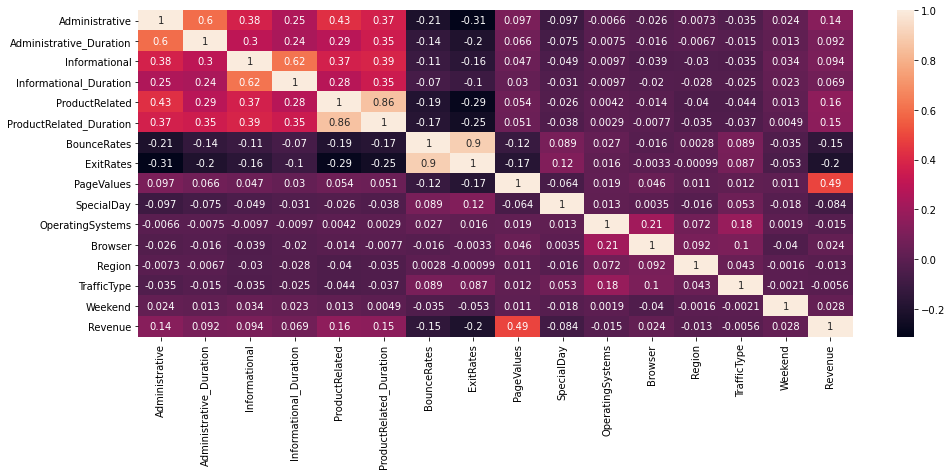

In [11]:
# Check correlation values
# Collinearity between (ProductRelate_Duration,ProductRelated), (ExitRates,BounceRates)

plt.figure(figsize=(16,6))
sns.heatmap(shopper.corr(),annot=True);


In [12]:
# Modify values 'Revenue' column where False is 0 and True is 1

lb = LabelEncoder()
shopper['mod_Revenue'] = lb.fit_transform(shopper['Revenue'])
shopper['mod_Revenue'].value_counts(normalize=True)


0    0.843671
1    0.156329
Name: mod_Revenue, dtype: float64

In [13]:
# Split data into train and test data set
X = shopper.drop(['Revenue','mod_Revenue'],axis=1)
y = shopper['mod_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,
                                                    random_state=4321)

In [14]:
# Setup numerical and categorical pipeline and incorporate both into
# ColumnTransformer


nums_pipe = Pipeline([('ss',StandardScaler())])
nums_pipe2 = Pipeline([('mm',MinMaxScaler())])
cats_pipe = Pipeline([('ohe',OneHotEncoder(sparse=False))])

trans = ColumnTransformer([('nums',nums_pipe,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

trans2 = ColumnTransformer([('nums2',nums_pipe2,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

X_train_processed = trans.fit_transform(X_train)  # for numerics use StandardScaler
X_test_processed = trans.transform(X_test)

X_train_processed2 = trans2.fit_transform(X_train) # for numerics use MinMaxScaler
X_test_processed2 = trans2.transform(X_test)


In [15]:
# Incorporate processed X_train and X_test into dataframe (if there is a need for later)

num_col_names = trans.transformers_[0][2] 
cat_col_names = ['x0_Aug','x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar', 'x0_May', 
                 'x0_Nov','x0_Oct', 'x0_Sep', 'x1_New_Visitor', 'x1_Other',
                 'x1_Returning_Visitor', 'x2_False', 'x2_True']

col_names = num_col_names + cat_col_names

X_train_process_df = pd.DataFrame(X_train_processed,columns=col_names,
                                 index=X_train.index)
X_test_process_df = pd.DataFrame(X_test_processed,columns=col_names,
                                index=X_test.index)

X_train_process_df2 = pd.DataFrame(X_train_processed2,columns=col_names,
                                 index=X_train.index)
X_test_process_df2 = pd.DataFrame(X_test_processed2,columns=col_names,
                                index=X_test.index)


X_train_process_df3 = X_train_process_df[num_col_names].copy() # numerical features only
X_test_process_df3 = X_test_process_df[num_col_names].copy() # numerical features only

In [16]:

def feature_ranking(features,ranking,ascend):
    ranking_list = [(features[i],ranking[i]) for i in range(len(features))]
    rankings_sorted = sorted(ranking_list, key=lambda x: x[1], reverse=ascend)
    return rankings_sorted

def plot_feature_ranking(rankings,title,scale=None):
    col_names = [name[0] for name in rankings]
    values = [val[1] for val in rankings]
    
    fig, axs = plt.subplots(figsize=(12,8))
    plot = sns.barplot(x=col_names,y=values)
    plot.set_title(title)
    plot.set_xticklabels(rotation=90,labels=col_names)
    if scale == 'log': plot.set_yscale('log') 
        

In [17]:
# Feature selection/evaluation based on filter method SelectKBest with f_regression (method # 1)

kbest = SelectKBest(score_func=f_regression,k='all')
fit = kbest.fit(X_train_process_df2,y_train)

kbest_ranking = feature_ranking(X_train_process_df2.columns,fit.scores_,True)


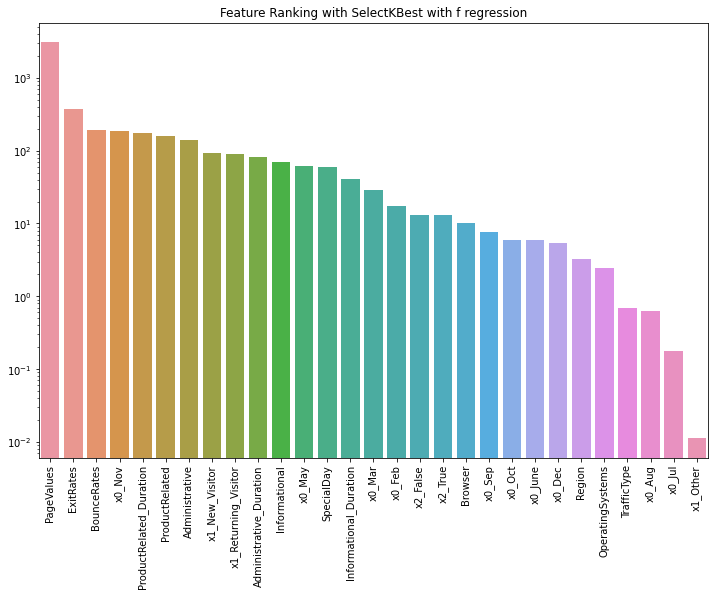

In [18]:
plot_feature_ranking(kbest_ranking,'Feature Ranking with SelectKBest with f regression','log')

Optimal number of features : 2


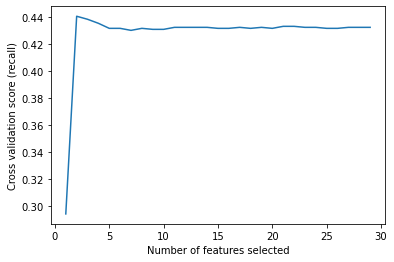

In [19]:
# Feature selection/evaluation based on wrapper method Recursive feature elimination with 
# cross-validation (RFECV) using SVC as estimator (method # 2)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear',random_state=43)


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(3),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_process_df, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
);


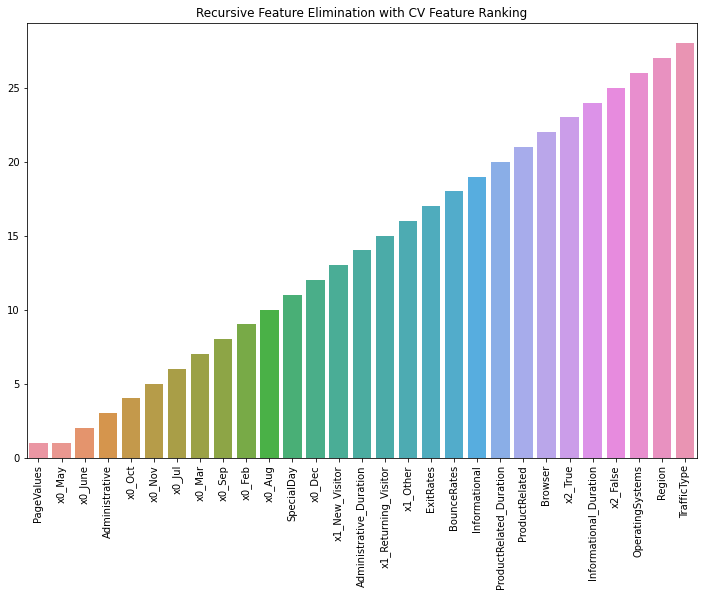

In [20]:
# Feature ranking based RFECV
rfecv_ranking = feature_ranking(X_train_process_df.columns,rfecv.ranking_,False)
plot_feature_ranking(rfecv_ranking,'Recursive Feature Elimination with CV Feature Ranking')

In [21]:
# Feature selection / evaluation based on summation of the absolute values of principal
# component loadings (method # 3)

pca = PCA(n_components=0.9,random_state=44)
pca.fit(X_train_process_df)

loadings = pd.DataFrame(
    data=abs(pca.components_.T) * pca.explained_variance_,
    columns=[f'PC{i}' for i in range(1, len(pca.explained_variance_) + 1)],
    index=X_train_process_df.columns
)

loadings['Abs_Sum'] = loadings.apply(lambda x: x.sum(),axis=1)
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Abs_Sum
Administrative,1.306911,0.087848,0.033634,0.251698,0.341420,0.323682,0.019569,0.051066,0.074670,0.013341,0.259254,0.032881,2.795974
Administrative_Duration,1.098764,0.147982,0.040586,0.353993,0.381991,0.444105,0.027981,0.080964,0.103885,0.005097,0.237812,0.022907,2.946068
Informational,1.208820,0.491132,0.052973,0.150456,0.467485,0.052324,0.025914,0.025711,0.036302,0.006720,0.101321,0.022361,2.641517
Informational_Duration,1.003595,0.513488,0.063819,0.158927,0.618819,0.049383,0.030129,0.034139,0.028565,0.008270,0.091619,0.022778,2.623530
ProductRelated,1.406086,0.275269,0.077526,0.384336,0.243425,0.334575,0.020802,0.096352,0.027258,0.018691,0.018865,0.002260,2.905448


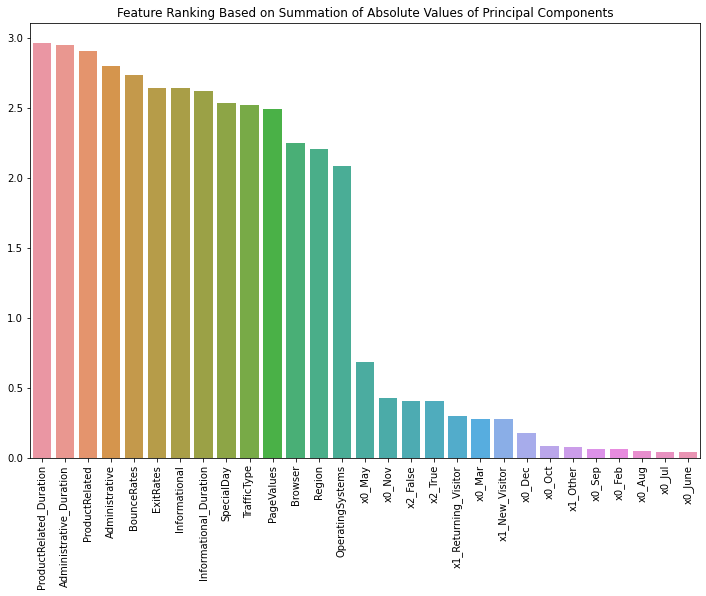

In [22]:
# Feature ranking based on summation of bbsolute values of principal components

pca_ranking = feature_ranking(list(loadings.index),
                              list(loadings['Abs_Sum']),True)

plot_feature_ranking(pca_ranking,
                     'Feature Ranking Based on Summation of Absolute Values of Principal Components')


In [106]:
num_col_names

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [23]:


bool_train_labels = y_train != 0
pos_df = X_train_process_df[ bool_train_labels].clip(-6,6)
neg_df = X_train_process_df[~bool_train_labels].clip(-6,6)

In [25]:

column_names = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'x0_Aug',
       'x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar', 'x0_May', 'x0_Nov',
       'x0_Oct', 'x0_Sep', 'x1_New_Visitor', 'x1_Other',
       'x1_Returning_Visitor', 'x2_False', 'x2_True']



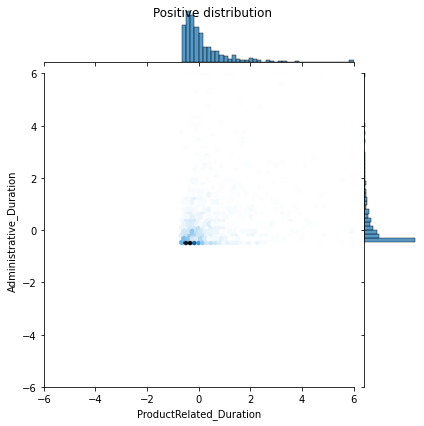

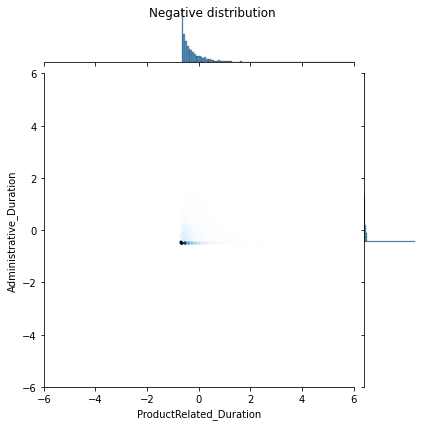

In [30]:
col1 = column_names[5]
col2 = column_names[1]

sns.jointplot(x=pos_df[col1], y=pos_df[col2],
              kind='hex', xlim=(-6,6), ylim=(-6,6))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df[col1], y=neg_df[col2],
              kind='hex', xlim=(-6,6), ylim=(-6,6))
_ = plt.suptitle("Negative distribution")


In [29]:
# Correct for classification imbalance with SMOTE (method # 1)

sm = SMOTE(random_state=41,k_neighbors=3)
X_train_sm, y_train_sm = sm.fit_resample(X_train_process_df, y_train) # StandardScaler
X_train_sm2,y_train_sm2 = sm.fit_resample(X_train_process_df2,y_train) # MinMaxScaler
X_train_sm3,y_train_sm3 = sm.fit_resample(X_train_process_df3,y_train) # Numerical features only


# Correct for classification imbalance with RandomOverSampler (method # 2)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_process_df, y_train) # StandardScaler
X_train_ros2, y_train_ros2 = ros.fit_resample(X_train_process_df2, y_train) # StandardScaler
X_train_ros3, y_train_ros3 = ros.fit_resample(X_train_process_df3, y_train) # Numerical features only

In [30]:
# Display validation results for train sample

def display_validation_results(results,model_name,train_time):
    v_recall = results['mean_test_recall'].mean()
    v_accuracy = results['mean_test_accuracy'].mean()
    v_precision = results['mean_test_precision'].mean()
    
    print('='*60)
    print(f'Validation results for: {model_name}')
    print(f'Recall: {v_recall}\nAccuracy: {v_accuracy}\nPrecision: {v_precision}')
    stop_time = time.time()
    print(f'\nTraining time for {model_name} took {train_time} seconds.\n')


In [31]:
# Display prediction results for test sample

def display_test_predictions(actuals, predictions, model_name):
    t_recall = recall_score(actuals, predictions)
    t_accuracy = accuracy_score(actuals,predictions)
    t_precision = precision_score(actuals,predictions)
    
    print(f'Test sample predictions result for: {model_name}')
    print(f'Recall: {t_recall}\nAccuracy: {t_accuracy}\nPrecision: {t_precision}\n')
    

In [32]:
# Display confusion matrix and ROC plot

def display_plots(y_actuals,y_predictions,model_name,model_list):
    
    conf_matrix = confusion_matrix(y_actuals, y_predictions)
    
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    
    
    ax1.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax1.text(x=j,y=i, s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
 
    ax1.set_xlabel('Predictions',fontsize=12)
    ax1.set_ylabel('Actuals',fontsize=12)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(f'Confusion Matrix for: {model_name}',fontsize=14);
       
    
    model_names = [model[2] for model in model_list]
    
    if model_name not in model_names:
        model_list.append((y_actuals,y_predictions,model_name))
    
    for model in model_list:
        fpr, tpr, _ = metrics.roc_curve(model[0], model[1])
        auc = metrics.roc_auc_score(model[0], model[1])
        name_auc = model[2] + ' AUC: ' + format(auc,'0.2f')          
        ax2.plot(fpr,tpr,label=name_auc)
        ax2.set_title('ROC Plot',fontsize=14)
        ax2.set_xlabel('False Positive Rate',fontsize=12)
        ax2.set_ylabel('True Positive Rate',fontsize=12)
        ax2.legend()
        
    plt.tight_layout(pad=1.1)  
    plt.show()

In [34]:
# Call functions to show validation and prediction results and also display visuals like
# confusion matrix and ROC cuve

def show_results(model,model_name,train_time,y_actuals,y_predictions,model_list):
    display_validation_results(model.cv_results_,model_name,train_time)
    display_test_predictions(y_actuals, y_predictions, model_name)
    display_plots(y_actuals,y_predictions,model_name,model_list)
    

In [35]:
# DummyClassifier
# Create a pipe for base model and incorporate it into gridsearchcv

start = time.time()


base_grid_search = GridSearchCV(estimator=DummyClassifier(),
                                param_grid= {'random_state' : [1234],
                                            'strategy' : ['prior']},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model and predict for test samples
base_grid_search.fit(X_train_process_df,y_train)
base_y_test_pred = base_grid_search.predict(X_test_process_df)
model_name = 'DummyClassifier'

stop = time.time()

/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation results for: DummyClassifier
Recall: 0.0
Accuracy: 0.8436146698221154
Precision: 0.0

Training time for DummyClassifier took 0.14456415176391602 seconds.

Test sample predictions result for: DummyClassifier
Recall: 0.0
Accuracy: 0.843801201529219
Precision: 0.0



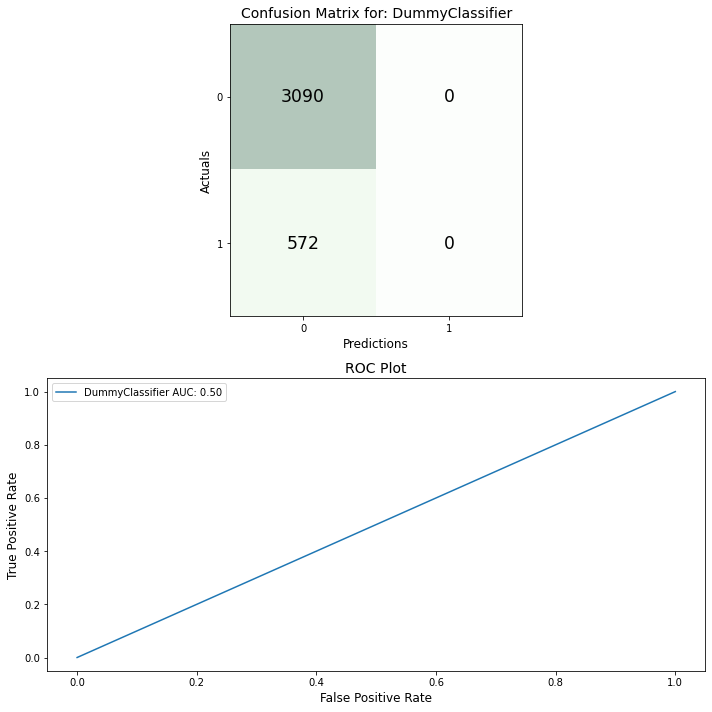

In [36]:
# Display results

base_models = []
show_results(base_grid_search,
             model_name,
             stop-start,
             y_test,
             base_y_test_pred,
             base_models)


In [37]:
# MultinomialNB
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
mn_grid_search.fit(X_train_process_df2,y_train) # X_train_process2_df is scaled with min_max
model_name2 = 'MultinomialNB'

stop = time.time()


Validation results for: MultinomialNB
Recall: 0.03293085136117167
Accuracy: 0.8470093580890806
Precision: 0.746808420337832

Training time for MultinomialNB took 0.20834898948669434 seconds.

Test sample predictions result for: MultinomialNB
Recall: 0.045454545454545456
Accuracy: 0.8495357728017476
Precision: 0.8387096774193549



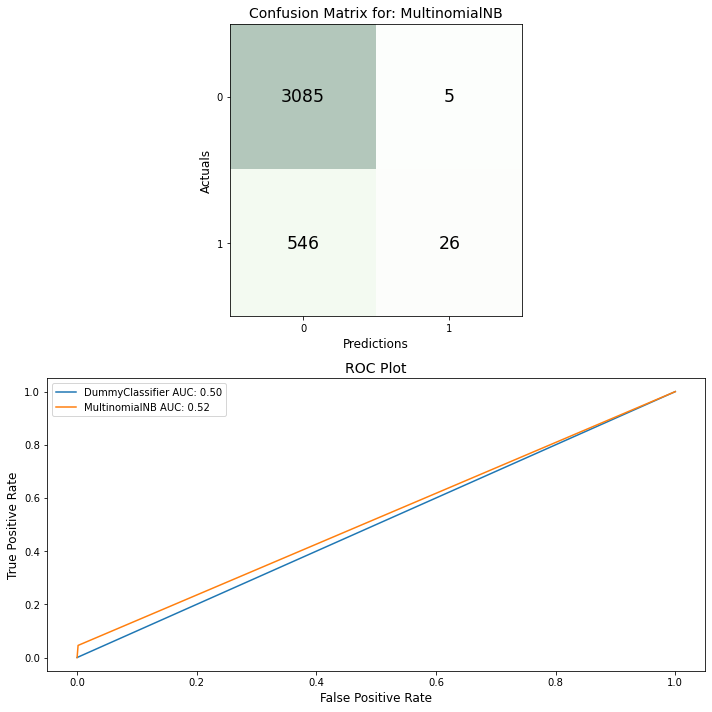

In [38]:
# Predict for X_test samples and display results

mn_y_test_pred = mn_grid_search.predict(X_test_process_df2)
show_results(mn_grid_search,
             model_name2,
             stop-start,
             y_test,
             mn_y_test_pred,
             base_models)


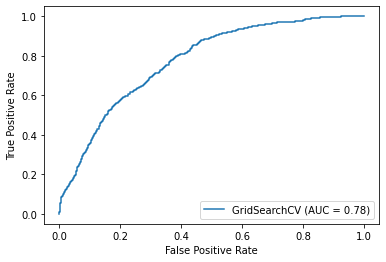

In [40]:
# Why plot_roc_curve gives a different result that fpr, tpr, 
# thresholds = metrics.roc_curve(y_test,mn_y_test_pred)method 

plot_roc_curve(mn_grid_search,X_test_process_df2,y_test);

In [39]:
# MultinomialNB with SMOTE sample balance
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


sm_mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
sm_mn_grid_search.fit(X_train_sm2,y_train_sm2) # X_train_process2_df is scaled with min_max
model_name3 = 'MultinomialNB + SMOTE'

stop = time.time()


Validation results for: MultinomialNB + SMOTE
Recall: 0.7388647889574296
Accuracy: 0.6871091706798786
Precision: 0.6697390364037293

Training time for MultinomialNB + SMOTE took 0.3520801067352295 seconds.

Test sample predictions result for: MultinomialNB + SMOTE
Recall: 0.756993006993007
Accuracy: 0.6572910977607864
Precision: 0.27953518398967075



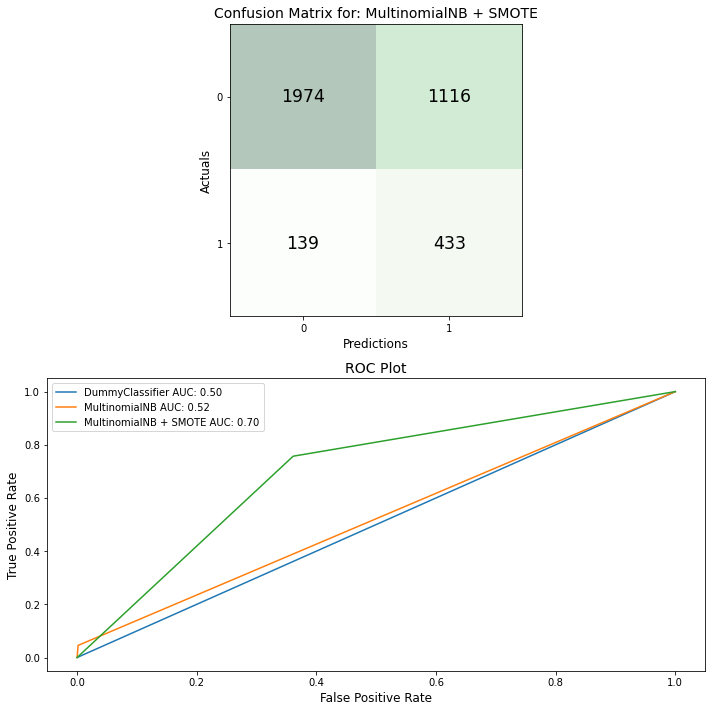

In [40]:
# Predict for X_test samples and display results

sm_mn_y_test_pred = sm_mn_grid_search.predict(X_test_process_df2)

show_results(sm_mn_grid_search,
             model_name3,
             stop-start,
             y_test,
             sm_mn_y_test_pred,
             base_models)


In [41]:
# MultinomialNB with ROS sample balance
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv

start = time.time()


ros_mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
ros_mn_grid_search.fit(X_train_ros2,y_train_ros2)
model_name4 = 'MultinomialNB + ROS'

stop = time.time()


Validation results for: MultinomialNB + ROS
Recall: 0.7439963578998634
Accuracy: 0.690924544393021
Precision: 0.6727252176684899

Training time for MultinomialNB + ROS took 0.3657560348510742 seconds.

Test sample predictions result for: MultinomialNB + ROS
Recall: 0.7622377622377622
Accuracy: 0.6619333697433096
Precision: 0.2834850455136541



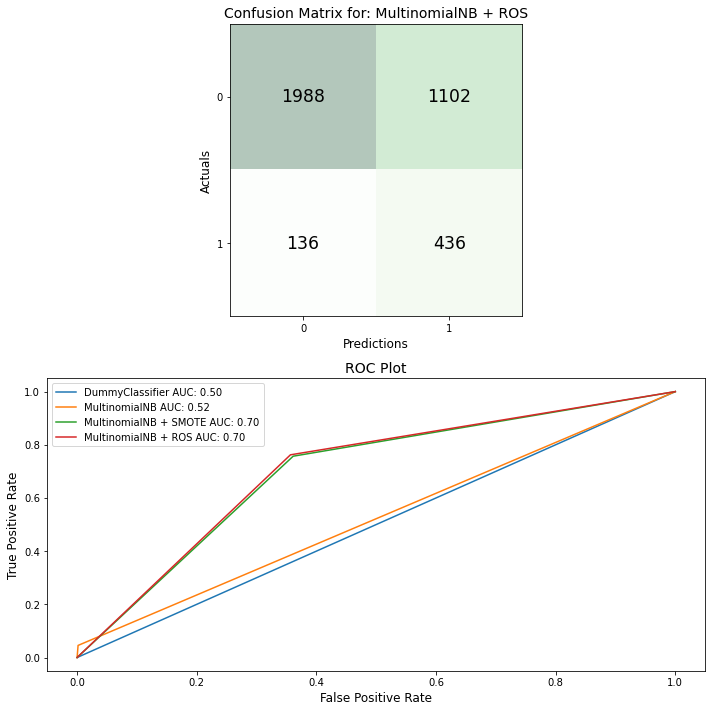

In [42]:
# Predict for X_test samples and display results

ros_mn_y_test_pred = ros_mn_grid_search.predict(X_test_process_df2)

show_results(ros_mn_grid_search,
             model_name4,
             stop-start,
             y_test,
             ros_mn_y_test_pred,
             base_models)


In [43]:
# LogisticRegression with SMOTE sample balance
# Create a pipe for LogisticRegression and incorporate it into gridsearchcv

start = time.time()

sm_lr_grid_search = GridSearchCV(estimator=LogisticRegression(),
                                param_grid= {'random_state' : [2345],
                                            'C': [1,100,1000],  
                                            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                            'max_iter' : [1000,5000]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
sm_lr_grid_search.fit(X_train_sm,y_train_sm)
model_name5 = 'LogisticRegression + SMOTE'

stop = time.time()


In [44]:
sm_lr_grid_search.best_params_

{'C': 1, 'max_iter': 1000, 'random_state': 2345, 'solver': 'newton-cg'}

Validation results for: LogisticRegression + SMOTE
Recall: 0.787570787867238
Accuracy: 0.8274059032469085
Precision: 0.8558218355292216

Training time for LogisticRegression + SMOTE took 33.2406530380249 seconds.

Test sample predictions result for: LogisticRegression + SMOTE
Recall: 0.75
Accuracy: 0.84598580010923
Precision: 0.5047058823529412



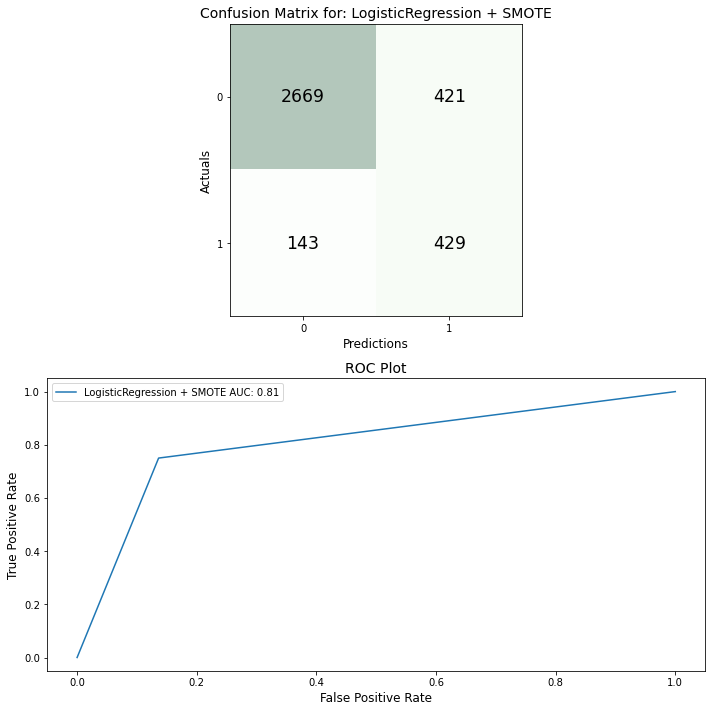

In [46]:
# Predict for X_test samples and display results

sm_lr_y_test_pred = sm_lr_grid_search.predict(X_test_process_df)

models = []
show_results(sm_lr_grid_search,
             model_name5,
             stop-start,
             y_test,
             sm_lr_y_test_pred,
             models)

In [47]:
# LogisticRegression with ROS sample balance
# Create a pipe for LogisticRegression and incorporate it into gridsearchcv

start = time.time()

ros_lr_grid_search = GridSearchCV(estimator=LogisticRegression(),
                                param_grid= {'random_state' : [2345],
                                            'C': [1,100,1000],
                                            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                            'max_iter' : [1000,5000]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
ros_lr_grid_search.fit(X_train_ros,y_train_ros)
model_name6 = 'LogisticRegression + ROS'

stop = time.time()


In [48]:
ros_lr_grid_search.best_params_

{'C': 1, 'max_iter': 1000, 'random_state': 2345, 'solver': 'newton-cg'}

Validation results for: LogisticRegression + ROS
Recall: 0.7681879942237165
Accuracy: 0.822633887200854
Precision: 0.8621425503193358

Training time for LogisticRegression + ROS took 45.232527017593384 seconds.

Test sample predictions result for: LogisticRegression + ROS
Recall: 0.7377622377622378
Accuracy: 0.855816493719279
Precision: 0.5275



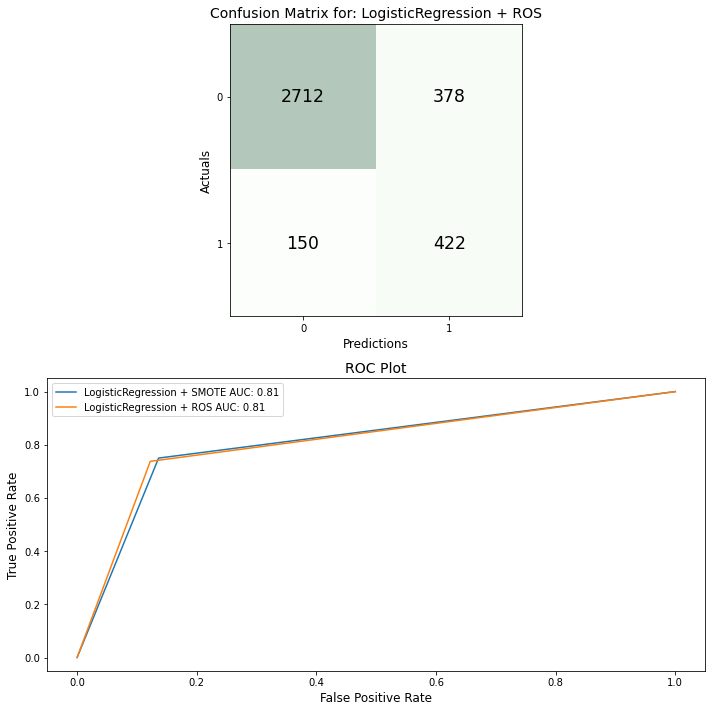

In [49]:
ros_lr_y_test_pred = ros_lr_grid_search.predict(X_test_process_df)

show_results(ros_lr_grid_search,
             model_name6,
             stop-start,
             y_test,
             ros_lr_y_test_pred,
             models)

In [220]:
y_train.value_counts()[0]/y_train.value_counts()[1]

5.394461077844311

In [99]:
# XGBRFClassifier with no sample balance correction
# Adjusted for classification imbalance through colsample_bytree hyperparameter
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv

start = time.time()

xgbrf_grid_search = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,21,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [0.5], # 0.5 gives a recall of 0.99
                                             'scale_pos_weight' : [11]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
xgbrf_grid_search.fit(X_train_process_df,y_train)
model_name7 = 'XGBRFClassifier'

stop = time.time()


# changing scale_pos_weight 
1   ==> recall ~ 0.54 when colsample_bytree = 1

5.4 ==> recall ~ 0.8  when colsample_bytree = 1
5.4 ==> recall ~ 0.81  when colsample_bytree = 0.5
5.4 ==> recall ~ 0.84  when colsample_bytree = 0.2

8.0 ==> recall ~ 0.86 when colsample_bytree = 1

11  ==> recall ~ 0.87 when colsample_bytree = 1
11  ==> recall ~ 0.92 when colsample_bytree = 0.5

15  ==> recall ~ 0.96 when colsample_bytree = 0.5

In [100]:

xgbrf_grid_search.best_params_



{'colsample_bytree': 0.5,
 'gamma': 1,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_delta_step': 0.6,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 2345,
 'scale_pos_weight': 11,
 'subsample': 1}

Validation results for: XGBRFClassifier
Recall: 0.9214181899491306
Accuracy: 0.7415442148811294
Precision: 0.3695561792604274

Training time for XGBRFClassifier took 1.2786579132080078 seconds.

Test sample predictions result for: XGBRFClassifier
Recall: 0.9213286713286714
Accuracy: 0.7329328235936646
Precision: 0.36095890410958903



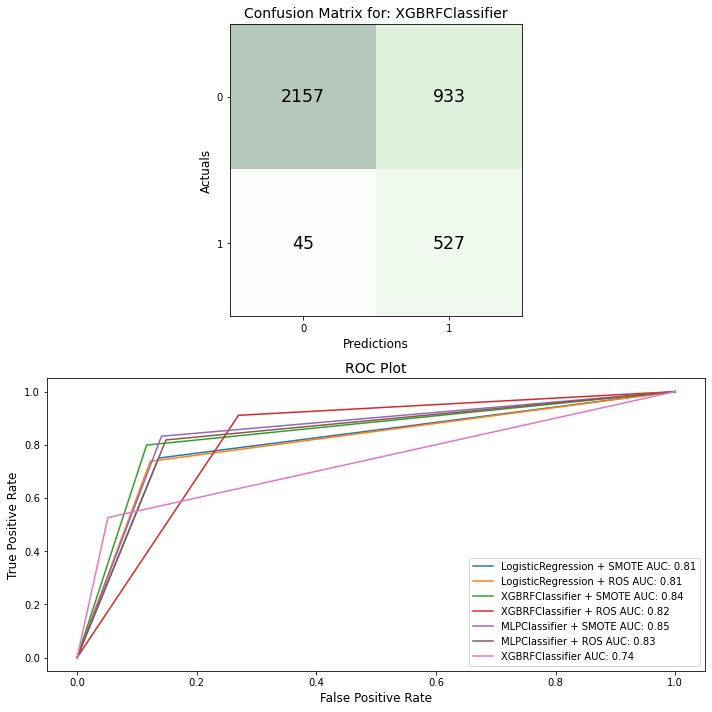

In [101]:
sm_xgbrf_y_test_pred = sm_xgbrf_grid_search.predict(X_test_process_df)

show_results(sm_xgbrf_grid_search,
             model_name7,
             stop-start,
             y_test,
             sm_xgbrf_y_test_pred,
             models)

In [102]:
print(xgbrf_grid_search.best_estimator_.feature_importances_)
xgbrf_grid_search.best_estimator_.importance_type

[1.1792856e-02 1.6991744e-02 9.5587149e-03 6.8367068e-03 3.7625372e-02
 6.7943543e-02 5.8727872e-02 1.1878412e-01 4.7401905e-01 1.0650979e-02
 1.5354035e-03 1.6545551e-03 9.1509959e-03 6.4739296e-03 4.5184622e-04
 0.0000000e+00 4.9052201e-03 3.8575542e-03 0.0000000e+00 1.2145539e-02
 1.3844521e-02 7.1116626e-02 1.0990876e-02 6.7846179e-03 2.2596654e-02
 0.0000000e+00 1.7334964e-02 4.2257369e-03 0.0000000e+00]


'gain'

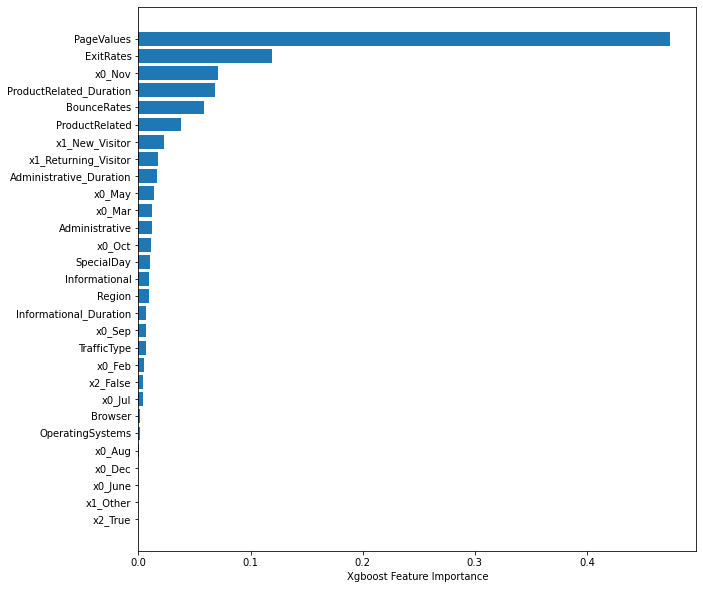

In [103]:
sorted_idx = xgbrf_grid_search.best_estimator_.feature_importances_.argsort()
fig,axs = plt.subplots(figsize=(10,10))
plt.barh(X_train_process_df.columns[sorted_idx], xgbrf_grid_search.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance");

In [58]:
# XGBRFClassifier with ROS sample balance
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv

start = time.time()

ros_xgbrf_grid_search = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10 
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [1],
                                             'scale_pos_weight' : [5.3]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
ros_xgbrf_grid_search.fit(X_train_ros,y_train_ros)
model_name8 = 'XGBRFClassifier + ROS'

stop = time.time()


In [59]:

ros_xgbrf_grid_search.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_delta_step': 0.6,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 2345,
 'scale_pos_weight': 5.3,
 'subsample': 1}

Validation results for: XGBRFClassifier + ROS
Recall: 0.9400602140022581
Accuracy: 0.8280832889827974
Precision: 0.7681553608921947

Training time for XGBRFClassifier + ROS took 8.065163135528564 seconds.

Test sample predictions result for: XGBRFClassifier + ROS
Recall: 0.9108391608391608
Accuracy: 0.7583287820862916
Precision: 0.3845018450184502



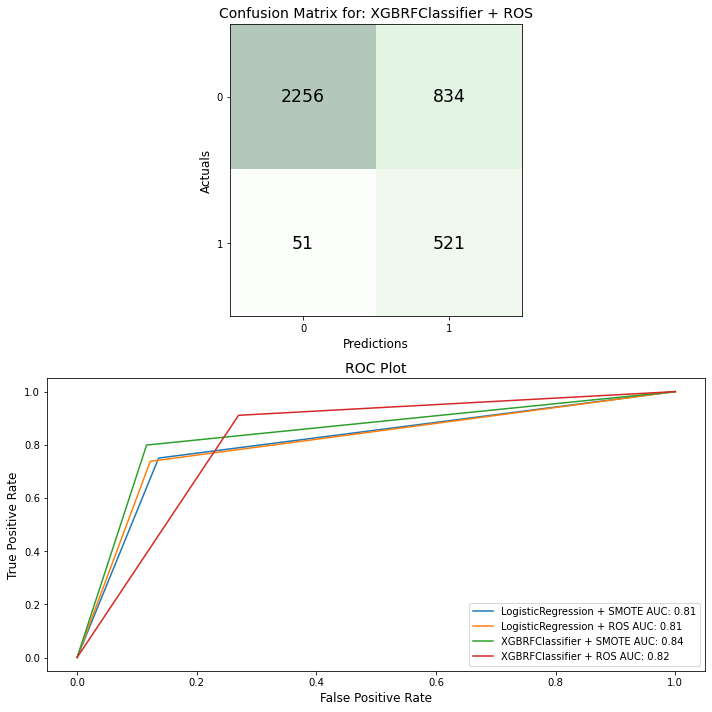

In [60]:
ros_xgbrf_y_test_pred = ros_xgbrf_grid_search.predict(X_test_process_df)

show_results(ros_xgbrf_grid_search,
             model_name8,
             stop-start,
             y_test,
             ros_xgbrf_y_test_pred,
             models)

In [61]:
print(ros_xgbrf_grid_search.best_estimator_.feature_importances_)
ros_xgbrf_grid_search.best_estimator_.importance_type

[1.0858128e-03 5.0931145e-03 1.4727058e-07 1.2668216e-03 1.4477283e-03
 0.0000000e+00 6.8396740e-02 1.3482572e-01 3.7283123e-02 0.0000000e+00
 1.6122432e-03 5.2107763e-03 2.3163657e-03 5.7919868e-03 0.0000000e+00
 0.0000000e+00 2.7579509e-03 0.0000000e+00 0.0000000e+00 1.5514182e-01
 2.0800687e-01 2.7262551e-01 7.1662604e-03 5.5936608e-02 0.0000000e+00
 0.0000000e+00 3.4034397e-02 0.0000000e+00 0.0000000e+00]


'gain'

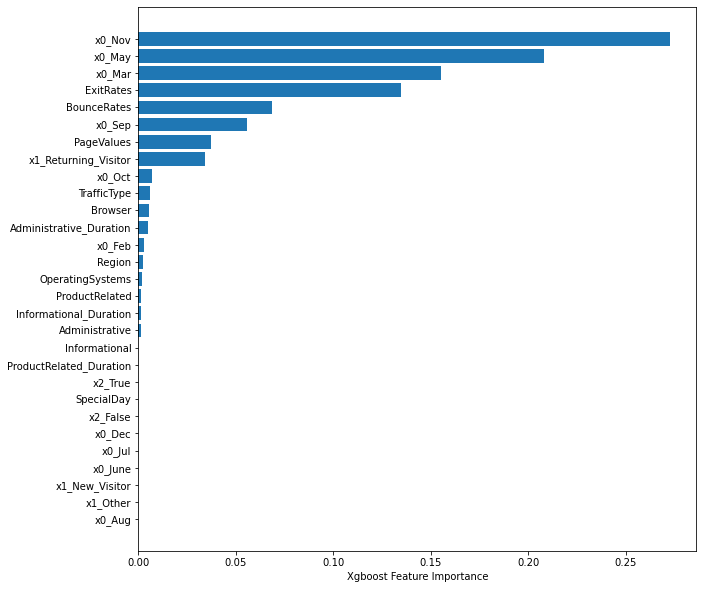

In [62]:
sorted_idx = ros_xgbrf_grid_search.best_estimator_.feature_importances_.argsort()
fig,axs = plt.subplots(figsize=(10,10))
plt.barh(X_train_process_df.columns[sorted_idx], ros_xgbrf_grid_search.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance");


In [142]:


#X_train_sm_cl = X_train_sm.clip(-5,5)
#X_test_process_cl = X_test_process_df.clip(-5,5)

In [63]:
# MLPClassifier with SMOTE sample balance
# Create a pipe for MLPClassifier and incorporate it into gridsearchcv

start = time.time()

sm_mlp_grid_search = GridSearchCV(estimator=MLPClassifier(),
                                param_grid= {'random_state' : [6786],
                                             'hidden_layer_sizes' : [(5,3)], # tried (300,150,50),(10,3),(300,),(600,),(100,)
                                             'activation' : ['relu'],  # tried 'identity', 'logistic', 'tanh', 'relu'
                                             'max_iter' : [2000],
                                             'solver' : ['adam'], # tried 'lbfgs', 'sgd', 'adam'
                                             'alpha' : [0.0001], # tried 0.0001, 0.001
                                             'learning_rate' : ['constant'] # tried 'constant', 'invscaling', 'adaptive'
                                             },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
sm_mlp_grid_search.fit(X_train_sm,y_train_sm)
model_name9 = 'MLPClassifier + SMOTE'

stop = time.time()


In [64]:

sm_mlp_grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5, 3),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'random_state': 6786,
 'solver': 'adam'}

Validation results for: MLPClassifier + SMOTE
Recall: 0.8991298037173678
Accuracy: 0.8758153939326542
Precision: 0.859220131938482

Training time for MLPClassifier + SMOTE took 105.77265405654907 seconds.

Test sample predictions result for: MLPClassifier + SMOTE
Recall: 0.8321678321678322
Accuracy: 0.8547241944292736
Precision: 0.5219298245614035



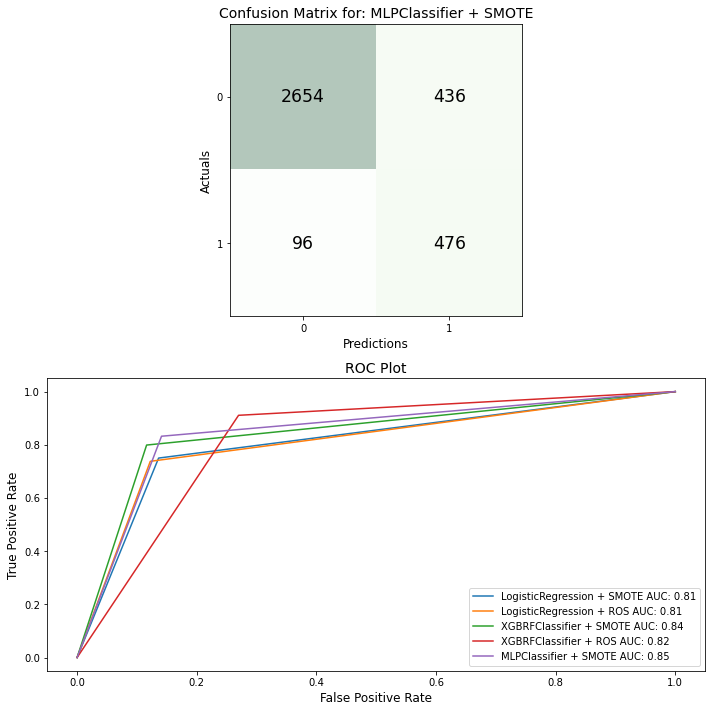

In [65]:
sm_mlp_y_test_pred = sm_mlp_grid_search.predict(X_test_process_df)

show_results(sm_mlp_grid_search,
             model_name9,
             stop-start,
             y_test,
             sm_mlp_y_test_pred,
             models)

In [66]:
# MLPClassifier with ROS sample balance
# Create a pipe for MLPClassifier and incorporate it into gridsearchcv

start = time.time()

ros_mlp_grid_search = GridSearchCV(estimator=MLPClassifier(),
                                param_grid= {'random_state' : [6786],
                                             'hidden_layer_sizes' : [(5,3)], # tried (300,150,50),(10,3),(300,),(600,),(100,)
                                             'activation' : ['relu'],  # tried 'identity', 'logistic', 'tanh', 'relu'
                                             'max_iter' : [2000],
                                             'solver' : ['adam'], # tried 'lbfgs', 'sgd', 'adam'
                                             'alpha' : [0.0001], # tried 0.0001, 0.001
                                             'learning_rate' : ['constant'] # tried 'constant', 'invscaling', 'adaptive'
                                             },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
ros_mlp_grid_search.fit(X_train_ros,y_train_ros)
model_name10 = 'MLPClassifier + ROS'

stop = time.time()


In [67]:

ros_mlp_grid_search.best_params_


{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5, 3),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'random_state': 6786,
 'solver': 'adam'}

Validation results for: MLPClassifier + ROS
Recall: 0.8853884794520681
Accuracy: 0.8633274383828434
Precision: 0.8480431616642636

Training time for MLPClassifier + ROS took 89.05983376502991 seconds.

Test sample predictions result for: MLPClassifier + ROS
Recall: 0.8181818181818182
Accuracy: 0.8462588749317312
Precision: 0.5048543689320388



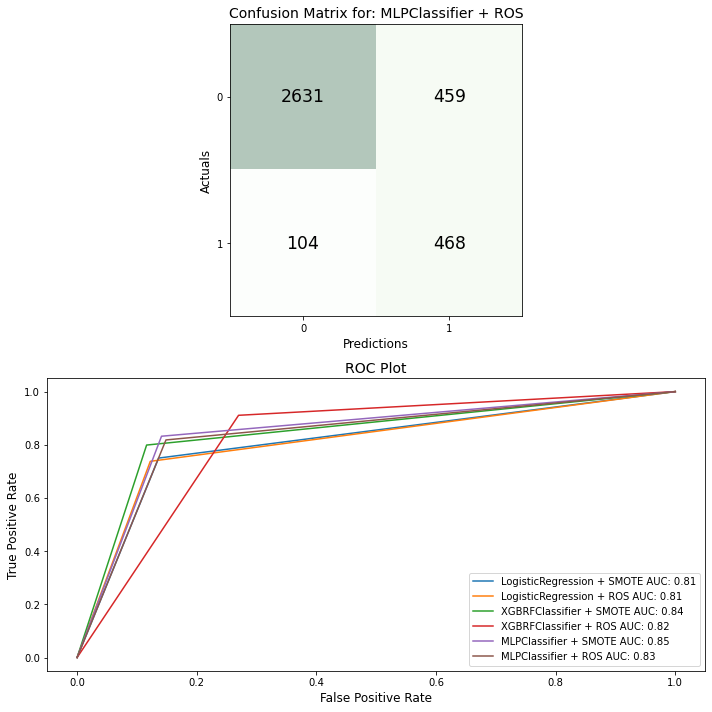

In [68]:
ros_mlp_y_test_pred = ros_mlp_grid_search.predict(X_test_process_df)

show_results(ros_mlp_grid_search,
             model_name10,
             stop-start,
             y_test,
             ros_mlp_y_test_pred,
             models)

In [90]:
len(X_train_sm)

11531

In [243]:
X_train_sm,X_val_sm, y_train_sm, y_val_sm = train_test_split(X_train_sm,y_train_sm,
                                                            test_size=0.2, stratify=y_train_sm)

In [258]:
sq_sm = Sequential()
sq_sm.add(Dense(3,activation='relu',input_shape=(X_train_sm.shape[-1],)))
sq_sm.add(Dropout(0.5))
sq_sm.add(Dense(1,activation='sigmoid'))

In [259]:
metrics = [
    keras.metrics.Precision(name='precision'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Recall(name='recall')]

sq_sm.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
          loss=keras.losses.BinaryCrossentropy(),
          metrics=metrics)

In [260]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


In [261]:
sq_sm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [262]:
sq_train = sq_sm.fit(X_train_sm,y_train_sm,
             batch_size=300,
             epochs=50,
             callbacks=early_stopping,
             validation_data=(X_val_sm, y_val_sm))

Epoch 1/50
39/39 [==============================] - 0s 9ms/step - loss: 0.7321 - precision: 0.5435 - accuracy: 0.5370 - recall: 0.4619 - val_loss: 0.7031 - val_precision: 0.5358 - val_accuracy: 0.5463 - val_recall: 0.6956
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.7035 - precision: 0.5723 - accuracy: 0.5630 - recall: 0.4987 - val_loss: 0.6815 - val_precision: 0.5855 - val_accuracy: 0.6115 - val_recall: 0.7649
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6801 - precision: 0.5999 - accuracy: 0.5883 - recall: 0.5301 - val_loss: 0.6647 - val_precision: 0.6217 - val_accuracy: 0.6556 - val_recall: 0.7954
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6687 - precision: 0.6229 - accuracy: 0.6094 - recall: 0.5544 - val_loss: 0.6499 - val_precision: 0.6534 - val_accuracy: 0.6871 - val_recall: 0.7975
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6570 - precision: 0.6500 - accuracy: 0

In [249]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics = ['loss', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


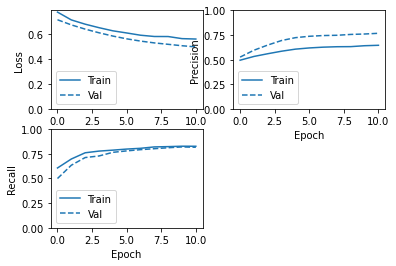

In [250]:
plot_metrics(sq_train)

In [252]:
sm_sq_y_test_pp = sq_sm.predict(X_test_process_df,batch_size=300)

In [253]:
sm_sq_y_test_pred = np.argmax(sm_sq_y_test_pp, axis=-1)

In [255]:
#display_test_predictions(actuals, predictions, model_name)

In [256]:
display_test_predictions(y_test,sm_sq_y_test_pred,'Sequential + SMOTE')

Test sample predictions result for: Sequential + SMOTE
Recall: 0.0
Accuracy: 0.843801201529219
Precision: 0.0



/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
